# Importing Essential Python Libraries


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import os
from collections import Counter

# Importing Dataset For EDA

In [71]:
data2=pd.read_csv('ipl_dataset/all_season_summary.csv')
data2=pd.DataFrame(data2)
data2.shape

(1032, 45)

In [72]:
data2.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,...,"Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,...,"KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,...,"Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Dinesh ...","Rohit Sharma (UKN),Ishan Kishan (WK),Cameron G...","Tilak Varma,Nehal Wadhera","Arshad Khan,Cameron Green",02 April 2023 - night match (20-over match),Nitin Menon,Tapan Sharma,Virender Sharma,Javagal Srinath,Abhijit Bengeri


In [73]:
data2.tail()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
1027,2008.0,336012,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"55th match (D/N), Indian Premier League at Ben...",RCB,MI,MI,BOWL FIRST,122/9,...,"Mark Boucher (BT),Shreevats Goswami (WK),Misba...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Fernando,Dwayne Smith",28 May 2008 - day/night match (20-over match),Billy Bowden,Arani Jayaprakash,Billy Doctrove,Sir Clive Lloyd,NaN
1028,2008.0,336019,Kings XI Punjab v Rajasthan Royals,KXIP v RR,"56th match (N), Indian Premier League at Mohal...",KXIP,RR,RR,BOWL FIRST,221/3,...,"Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...","Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...","Niraj Patel,Yusuf Pathan","Shane Watson,Yusuf Pathan",28 May 2008 - night match (20-over match),Krishna Hariharan,Steve Davis,Daryl Harper,Srinivas Venkataraghavan,MS Mahal
1029,2008.0,336038,Delhi Daredevils v Rajasthan Royals,DC v RR,"1st Semi-Final (N), Indian Premier League at M...",DC,RR,DC,BOWL FIRST,192/9,...,"Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Shane Watson,Yusuf Pathan","Shane Watson,Munaf Patel",30 May 2008 - night match (20-over match),Billy Bowden,Rudi Koertzen,Billy Doctrove,Javagal Srinath,NaN
1030,2008.0,336039,Chennai Super Kings v Kings XI Punjab,CSK v KXIP,"2nd Semi-Final (N), Indian Premier League at M...",CSK,KXIP,KXIP,BAT FIRST,112/8,...,"Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...","Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...","Ramesh Powar,Wilkin Mota","Irfan Pathan,Vikram Singh",31 May 2008 - night match (20-over match),Asad Rauf,Daryl Harper,Krishna Hariharan,Srinivas Venkataraghavan,NaN
1031,2008.0,336040,Chennai Super Kings v Rajasthan Royals,CSK v RR,"Final (N), Indian Premier League at Mumbai, Ju...",CSK,RR,RR,BOWL FIRST,163/5,...,"Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...","Niraj Patel (UKN),Swapnil Asnodkar (BT),Kamran...","Yusuf Pathan,Swapnil Asnodkar","Yusuf Pathan,Shane Watson",1 June 2008 - night match (20-over match),Billy Bowden,Rudi Koertzen,Daryl Harper,Javagal Srinath,MR Singh


In [74]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1029 non-null   float64
 1   id                1032 non-null   int64  
 2   name              1032 non-null   object 
 3   short_name        1032 non-null   object 
 4   description       1032 non-null   object 
 5   home_team         1032 non-null   object 
 6   away_team         1032 non-null   object 
 7   toss_won          1029 non-null   object 
 8   decision          1029 non-null   object 
 9   1st_inning_score  1021 non-null   object 
 10  2nd_inning_score  1019 non-null   object 
 11  home_score        1024 non-null   object 
 12  away_score        1021 non-null   object 
 13  winner            1031 non-null   object 
 14  result            1032 non-null   object 
 15  start_date        1032 non-null   object 
 16  end_date          1032 non-null   object 


In [75]:
data2.isnull()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1029,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [76]:
data2.isnull().sum()

season               3
id                   0
name                 0
short_name           0
description          0
home_team            0
away_team            0
toss_won             3
decision             3
1st_inning_score    11
2nd_inning_score    13
home_score           8
away_score          11
winner               1
result               0
start_date           0
end_date             0
venue_id             0
venue_name           0
home_captain         3
away_captain         3
pom                 15
points              67
super_over           3
home_overs          11
home_runs           11
home_wickets        11
home_boundaries     11
away_overs          13
away_runs           13
away_wickets        13
away_boundaries     13
highlights          26
home_key_batsman    11
home_key_bowler     24
home_playx1          3
away_playx1          3
away_key_batsman    13
away_key_bowler     22
match_days           3
umpire1              3
umpire2              3
tv_umpire            5
referee    

In [77]:
data2.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [78]:
data2[['home_overs','home_runs','home_wickets','home_boundaries','away_overs','away_runs','away_wickets','away_boundaries']].describe()

,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
count,1021.000000,1021.000000,1021.000000,1021.000000,1019.000000,1019.000000,1019.00000,1019.000000
mean,19.090597,158.328110,5.791381,19.406464,19.077233,155.934249,5.96369,19.103042
std,2.094547,31.936013,2.407212,5.857484,2.116901,31.257009,2.51003,5.668493
min,1.100000,2.000000,0.000000,0.000000,3.200000,41.000000,0.00000,3.000000
25%,19.200000,138.000000,4.000000,15.000000,19.200000,137.000000,4.00000,15.000000
50%,20.000000,160.000000,6.000000,19.000000,20.000000,158.000000,6.00000,19.000000
75%,20.000000,180.000000,8.000000,23.000000,20.000000,176.000000,8.00000,23.000000
max,20.000000,263.000000,10.000000,42.000000,20.000000,257.000000,10.00000,41.000000


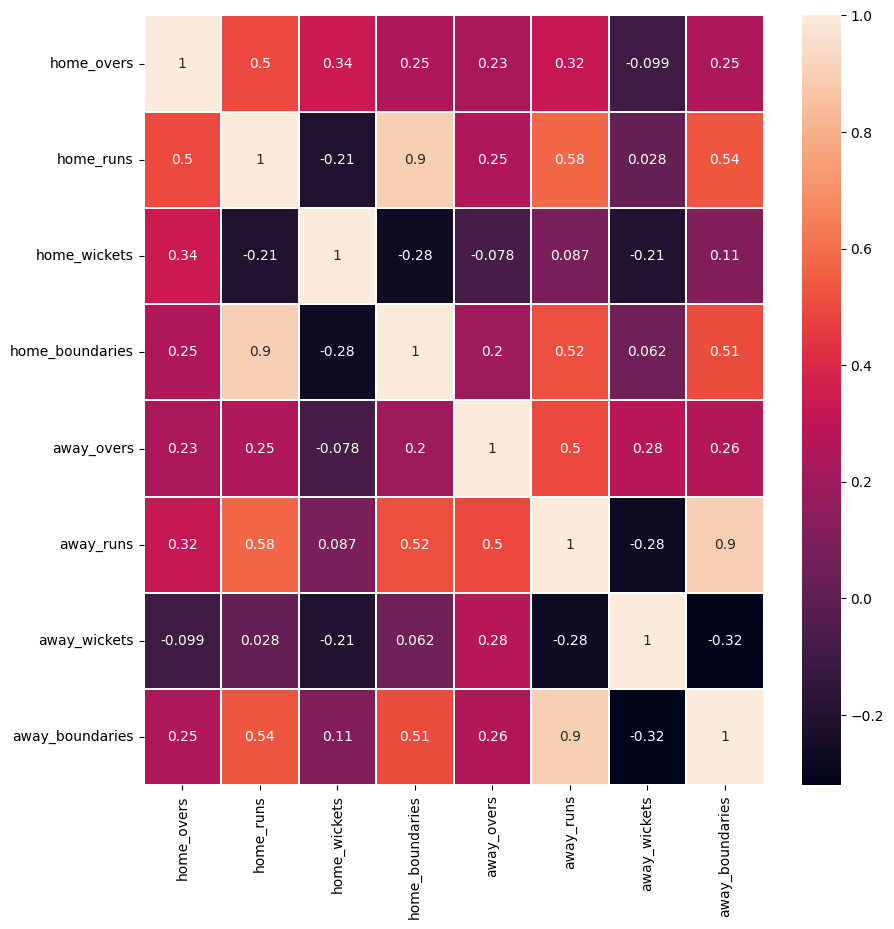

In [79]:
corr=data2[['home_overs','home_runs','home_wickets','home_boundaries','away_overs','away_runs','away_wickets','away_boundaries']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.05)
plt.show()

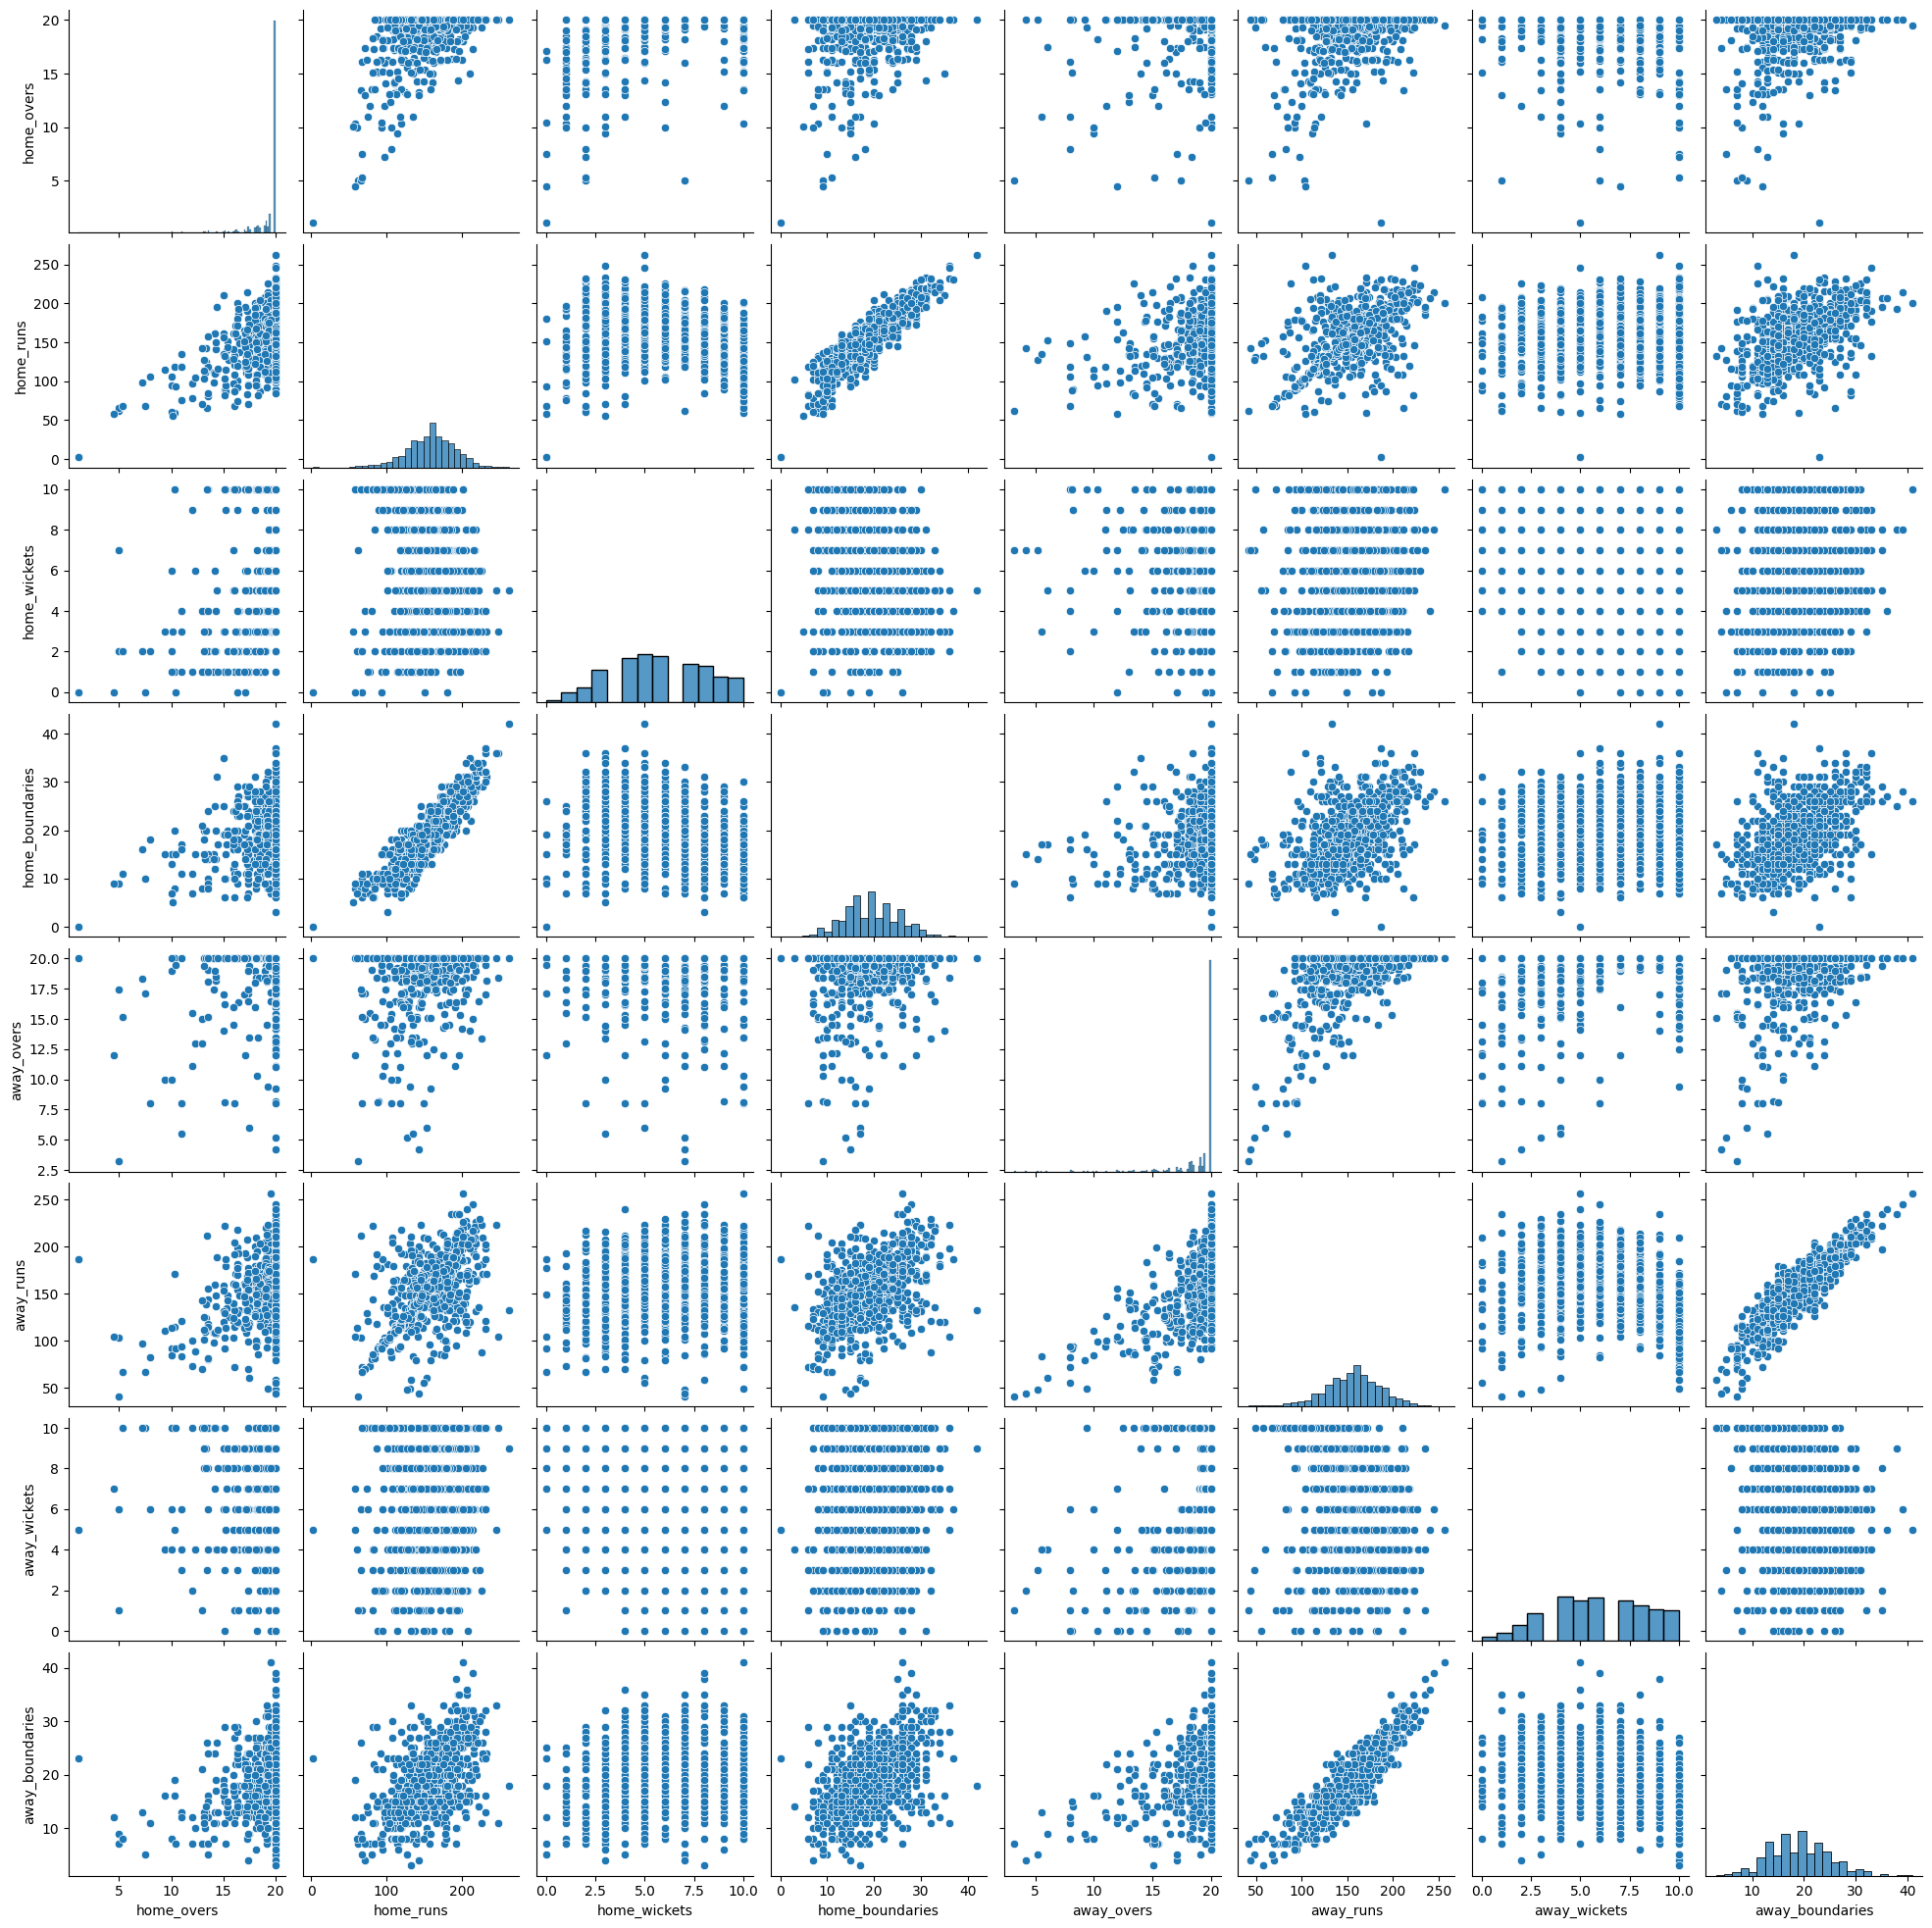

In [80]:
sns.pairplot(data2[['home_overs','home_runs','home_wickets','home_boundaries','away_overs','away_runs','away_wickets','away_boundaries']])
plt.show()

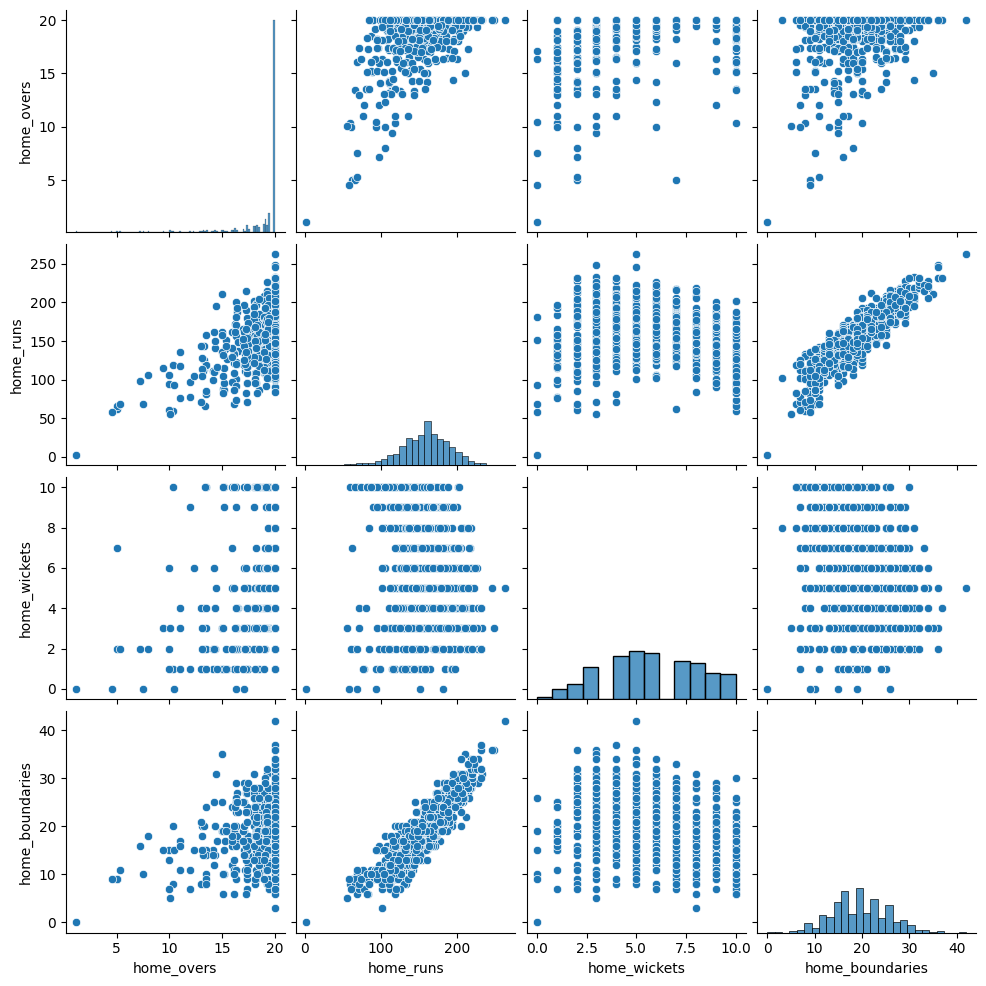

In [81]:
sns.pairplot(data2[['home_overs','home_runs','home_wickets','home_boundaries']])
plt.show()

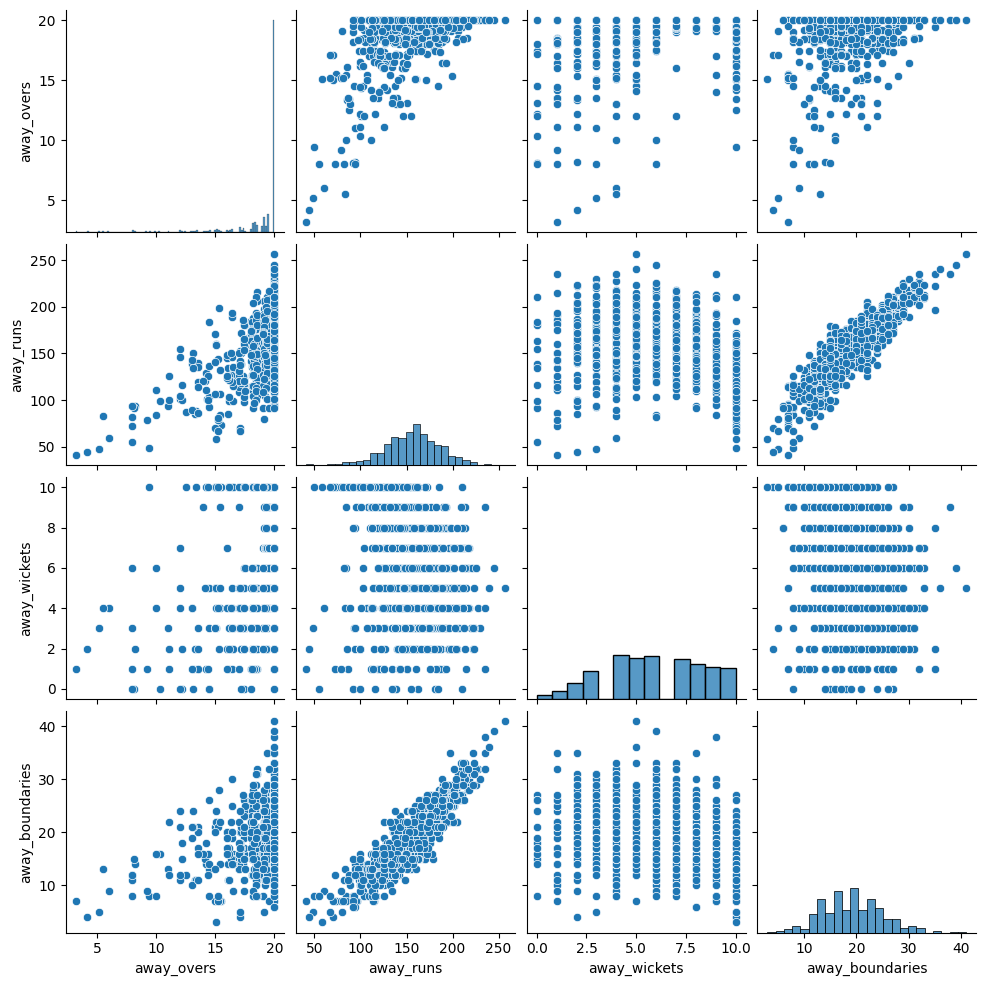

In [82]:
sns.pairplot(data2[['away_overs','away_runs','away_wickets','away_boundaries']])
plt.show()

In [83]:
data2['season'].unique()

array([2023.,   nan, 2022., 2021., 2020., 2019., 2018., 2017., 2016.,
       2015., 2014., 2013., 2012., 2011., 2010., 2009., 2008.])

In [84]:
data2['season'].fillna(2023.0, inplace=True)

In [85]:
data2['season'].unique()

array([2023., 2022., 2021., 2020., 2019., 2018., 2017., 2016., 2015.,
       2014., 2013., 2012., 2011., 2010., 2009., 2008.])

# Overall Team Analysis

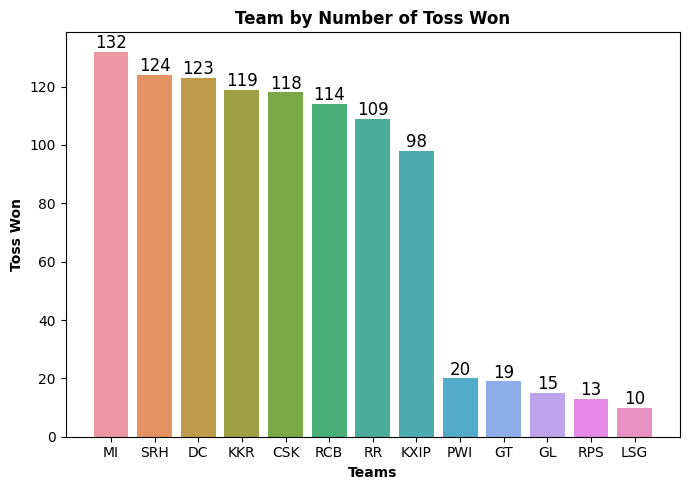

In [86]:
d1=data2['toss_won'].value_counts()[:13]
d1
plt.figure(figsize=(7,5))
ax=sns.barplot(x=d1.index,y=d1.values)

for i, v in enumerate(d1.values):
    ax.text(i, v+3, str(v), ha='center', va='center', fontsize=12, color='black')
    
plt.xlabel('Teams',weight='bold')
plt.ylabel('Toss Won',weight='bold')
plt.title('Team by Number of Toss Won',weight='bold')
plt.margins(0.05)
plt.tight_layout()
plt.show()

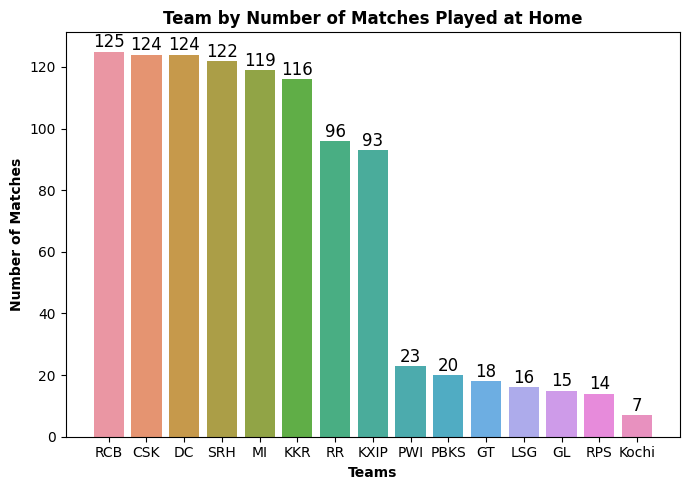

In [87]:
d1=data2['home_team'].value_counts()
d1
plt.figure(figsize=(7,5))
ax=sns.barplot(x=d1.index,y=d1.values)

for i, v in enumerate(d1.values):
    ax.text(i, v+3, str(v), ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Teams',weight='bold')
plt.ylabel('Number of Matches',weight='bold')
plt.title('Team by Number of Matches Played at Home',weight='bold')
plt.margins(0.05)
plt.tight_layout()
plt.show()

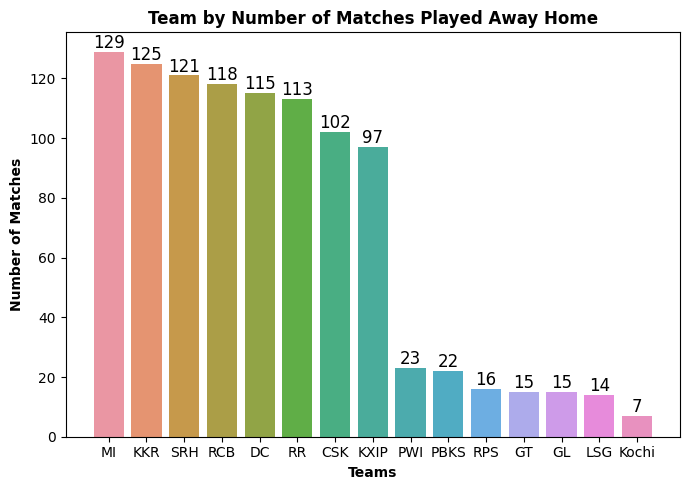

In [88]:
d1=data2['away_team'].value_counts()
d1
plt.figure(figsize=(7,5))
ax=sns.barplot(x=d1.index,y=d1.values)

for i, v in enumerate(d1.values):
    ax.text(i, v+3, str(v), ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Teams',weight='bold')
plt.ylabel('Number of Matches',weight='bold')
plt.title('Team by Number of Matches Played Away Home',weight='bold')
plt.margins(0.05)
plt.tight_layout()
plt.show()

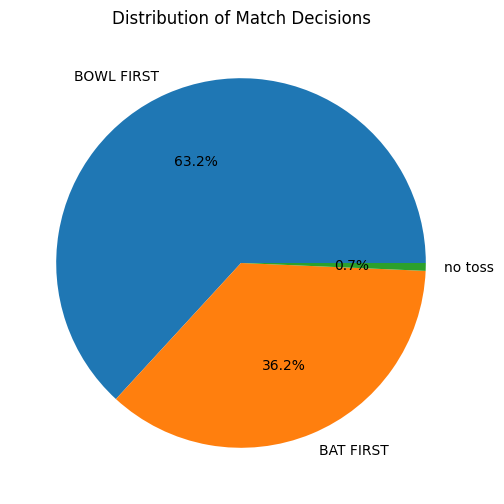

In [89]:
d1=data2['decision'].value_counts()
d1
plt.figure(figsize=(6, 6))
plt.pie(d1.values, labels=d1.index, autopct='%1.1f%%')
plt.title('Distribution of Match Decisions')
plt.show()

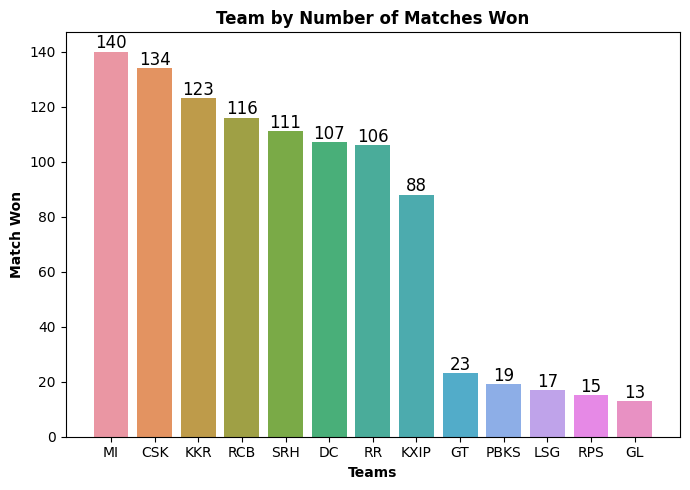

In [90]:
d1=data2['winner'].value_counts()[:13]
d1
plt.figure(figsize=(7,5))
ax=sns.barplot(x=d1.index,y=d1.values)

for i, v in enumerate(d1.values):
    ax.text(i, v+3, str(v), ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Teams',weight='bold')
plt.ylabel('Match Won',weight='bold')
plt.title('Team by Number of Matches Won',weight='bold')
plt.margins(0.05)
plt.tight_layout()
plt.show()

# Umpire Analysis

In [91]:
u1=data2['umpire1'].value_counts()
u1.head()

umpire1
Kumar Dharmasena           68
KN Ananthapadmanabhan      64
Chettithody Shamshuddin    61
Chris Gaffaney             60
Anil Chaudhary             58
Name: count, dtype: int64

In [92]:
u2=data2['umpire2'].value_counts()
u2.head()

umpire2
Sundaram Ravi      125
Anil Chaudhary      62
Nitin Menon         55
Nandan              53
Virender Sharma     43
Name: count, dtype: int64

In [93]:
u1=data2['umpire1'].unique()
u2=data2['umpire2'].unique()

In [94]:
u1

array(['Saiyed Khalid', 'Yeshwant Barde', 'Anil Chaudhary',
       'KN Ananthapadmanabhan', 'Nitin Menon', 'Bruce Oxenford',
       'Nand Kishore', 'Virender Sharma', 'Navdeep Singh',
       'Chris Gaffaney', 'Ulhas Gandhe', 'Michael Gough',
       'Jayaraman Madanagopal', nan, 'Akshay Totre', 'Nikhil Patwardhan',
       'Saidharshan Kumar', 'Tapan Sharma', 'Pashchim Pathak',
       'Chirra Ravikanthreddy', 'Sadashiv Iyer', 'Rohan Pandit',
       'Marais Erasmus', 'Richard Illingworth', 'Sundaram Ravi', 'Nandan',
       'Anil Dandekar', 'Paul Reiffel', 'Chettithody Shamshuddin',
       'Vineet Kulkarni', 'Rod Tucker', 'Ian Gould', 'Nigel Llong',
       'Abhijit Deshmukh', 'Kumar Dharmasena', 'Narendra Menon',
       'Krishnamachari Bharatan', 'Rajesh Deshpande',
       'Krishnaraj Srinath', 'Simon Fry', 'Johan Cloete', 'Aleem Dar',
       'Billy Bowden', 'Sanjay Hazare', 'Simon Taufel', 'Sudhir Asnani',
       'Asad Rauf', 'Shavir Tarapore', 'Billy Doctrove', 'Amiesh Saheba',
       'R

In [95]:
u2

array(['Nitin Menon', 'Bruce Oxenford', 'Nikhil Patwardhan',
       'Rohan Pandit', 'Tapan Sharma', 'Akshay Totre', 'Sadashiv Iyer',
       'Saidharshan Kumar', 'Vinod Seshan', 'Jayaraman Madanagopal',
       'Nand Kishore', 'Virender Sharma', nan, 'Chris Gaffaney',
       'Navdeep Singh', 'Rod Tucker', 'Michael Gough', 'Saiyed Khalid',
       'Pashchim Pathak', 'Ulhas Gandhe', 'Nitin Pandit',
       'Chirra Ravikanthreddy', 'Anil Chaudhary',
       'Krishnamachari Srinivasan', 'Sundaram Ravi',
       'Richard Illingworth', 'Anil Dandekar', 'Chettithody Shamshuddin',
       'Nandan', 'Paul Reiffel', 'Vineet Kulkarni', 'Yeshwant Barde',
       'Marais Erasmus', 'Ian Gould', 'Nigel Llong', 'Abhijit Deshmukh',
       'Kumar Dharmasena', 'Krishnamachari Bharatan', 'Simon Fry',
       'Krishnaraj Srinath', 'Aleem Dar', 'Rajesh Deshpande',
       'Subrat Das', 'Simon Taufel', 'Subroto Das', 'Sudhir Asnani',
       'Billy Bowden', 'Asad Rauf', 'Billy Doctrove', 'Rudi Koertzen',
       'Krishn

In [96]:
# Remove NaN values & find common values from the umpire arrays
u1_cleaned = u1[~pd.isna(u1)]
u2_cleaned = u2[~pd.isna(u2)]

common_values = np.intersect1d(u1_cleaned, u2_cleaned)
print(common_values)

['Abhijit Deshmukh' 'Akshay Totre' 'Aleem Dar' 'Anil Chaudhary'
 'Anil Dandekar' 'Arani Jayaprakash' 'Asad Rauf' 'Billy Bowden'
 'Billy Doctrove' 'Brian Jerling' 'Bruce Oxenford'
 'Chettithody Shamshuddin' 'Chirra Ravikanthreddy' 'Chris Gaffaney'
 'Daryl Harper' 'GA Pratapkumar' 'Gary Baxter' 'Ian Gould' 'Ian Howell'
 'Ivaturi Shivram' 'Jayaraman Madanagopal' 'Krishna Hariharan'
 'Krishnamachari Bharatan' 'Krishnaraj Srinath' 'Kumar Dharmasena'
 'Marais Erasmus' 'Mark Benson' 'Michael Gough' 'Nand Kishore' 'Nandan'
 'Navdeep Singh' 'Nigel Llong' 'Nikhil Patwardhan' 'Nitin Menon'
 'Pashchim Pathak' 'Paul Reiffel' 'Rajesh Deshpande' 'Richard Illingworth'
 'Rod Tucker' 'Rohan Pandit' 'Rudi Koertzen' 'Russell Tiffin'
 'Sadashiv Iyer' 'Saidharshan Kumar' 'Saiyed Khalid' 'Sanjay Hazare'
 'Shashank Ranade' 'Shavir Tarapore' 'Simon Fry' 'Simon Taufel'
 'Steve Davis' 'Sudhir Asnani' 'Sundaram Ravi' 'Suresh Shastri'
 'Tapan Sharma' 'Tyron Wijewardene' 'Ulhas Gandhe' 'Vineet Kulkarni'
 'Virender 

In [97]:
umpire_counts = {}

for umpire in common_values:
    count_umpire1 = len(data2[data2['umpire1'] == umpire])
    count_umpire2 = len(data2[data2['umpire2'] == umpire])
    
    total_count = count_umpire1 + count_umpire2
    
    umpire_counts[umpire] = total_count
# To print name and count of matches 
# for umpire, count in umpire_counts.items():
#     print(f"{umpire}: {count}")

<Figure size 1000x800 with 0 Axes>

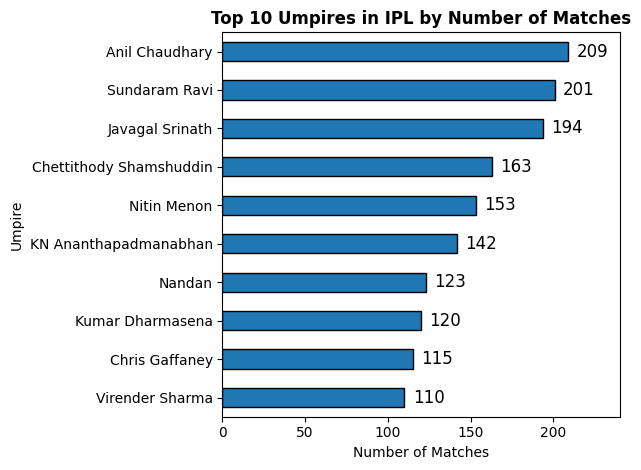

In [98]:
all_umpires = pd.concat([data2['umpire1'], data2['umpire2'], data2['tv_umpire'], data2['referee'], data2['reserve_umpire']])

all_umpires_cleaned = all_umpires.dropna().tolist()
umpire_counts = Counter(all_umpires_cleaned)
top_umpires = umpire_counts.most_common(10)
top_umpires_df = pd.DataFrame(top_umpires, columns=['Umpire', 'Number of Matches'])
top_umpires_df.set_index('Umpire', inplace=True)
top_umpires_df = top_umpires_df.sort_values(by='Number of Matches') 

plt.figure(figsize=(10, 8))
ax = top_umpires_df.plot(kind='barh', legend=False, edgecolor='black')
plt.ylabel('Umpire')
plt.xlabel('Number of Matches')
plt.title('Top 10 Umpires in IPL by Number of Matches',weight='bold')

for i, v in enumerate(top_umpires_df['Number of Matches']):
    ax.text(v + 5, i, str(v), va='center', fontsize=12, color='black')

plt.margins(0.15)
plt.tight_layout()
plt.show()

# Venue Analysis

In [99]:
data2['venue_name'].unique()

array(['Narendra Modi Stadium, Motera, Ahmedabad',
       'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'M.Chinnaswamy Stadium, Bengaluru',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Arun Jaitley Stadium, Delhi',
       'Barsapara Cricket Stadium, Guwahati', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Sawai Mansingh Stadium, Jaipur',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Navi Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Sheikh Zayed Stadium, Abu Dhabi',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
       'Holkar Cricket Stadium, Indore',
       'Saurashtr

In [138]:
venue=data2['venue_name'].value_counts()[:15]
venue

venue_name
Wankhede Stadium, Mumbai                                            111
M.Chinnaswamy Stadium, Bengaluru                                     90
Eden Gardens, Kolkata                                                88
Arun Jaitley Stadium, Delhi                                          86
MA Chidambaram Stadium, Chepauk, Chennai                             76
Rajiv Gandhi International Stadium, Uppal, Hyderabad                 71
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh     61
Sawai Mansingh Stadium, Jaipur                                       52
Maharashtra Cricket Association Stadium, Pune                        51
Dubai International Cricket Stadium                                  46
Sheikh Zayed Stadium, Abu Dhabi                                      37
Narendra Modi Stadium, Motera, Ahmedabad                             28
Sharjah Cricket Stadium                                              28
Brabourne Stadium, Mumbai                            

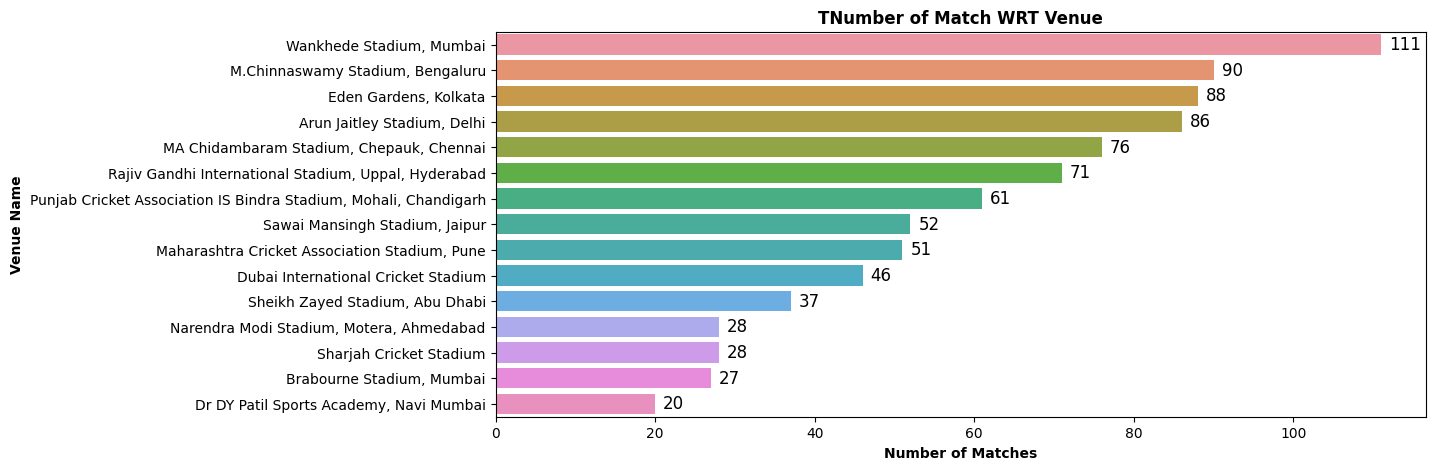

In [141]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x=venue.values,y=venue.index)

yticks = ax.get_yticks()
for i in range(len(yticks)):
    ax.annotate(str(venue.values[i]), (venue.values[i] + 1, yticks[i]), va='center', fontsize=12, color='black')

plt.xlabel('Number of Matches',weight='bold')
plt.ylabel('Venue Name',weight='bold')
plt.title('TNumber of Match WRT Venue',weight='bold')
plt.show()

In [196]:
toss_decision_counts = data2.groupby(['venue_name', 'decision']).size().unstack().fillna(0)
toss_decision_counts[:10]

decision,BAT FIRST,BOWL FIRST,no toss
venue_name,,,
"Arun Jaitley Stadium, Delhi",36.0,49.0,1.0
"Barabati Stadium, Cuttack",2.0,5.0,0.0
"Barsapara Cricket Stadium, Guwahati",0.0,2.0,0.0
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow",3.0,3.0,0.0
"Brabourne Stadium, Mumbai",9.0,18.0,0.0
"Buffalo Park, East London",3.0,0.0,0.0
"Diamond Oval, Kimberley",2.0,1.0,0.0
"Dr DY Patil Sports Academy, Mumbai",7.0,10.0,0.0
"Dr DY Patil Sports Academy, Navi Mumbai",3.0,17.0,0.0


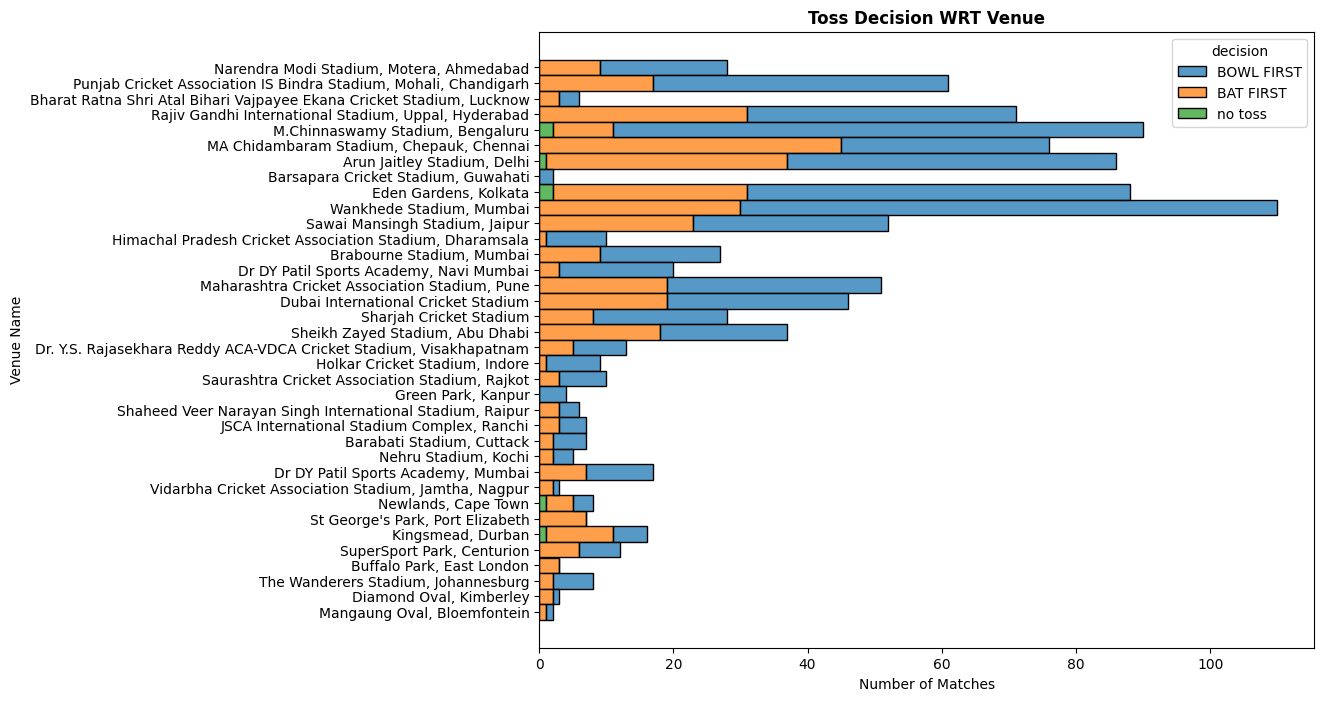

In [192]:
plt.figure(figsize=(10,8))
sns.histplot(data=data2, y=data2['venue_name'], hue=data2.decision, stat='count', multiple='stack', element='bars')
plt.xlabel('Number of Matches')
plt.ylabel('Venue Name')
plt.title('Toss Decision WRT Venue',weight='bold')
plt.show()

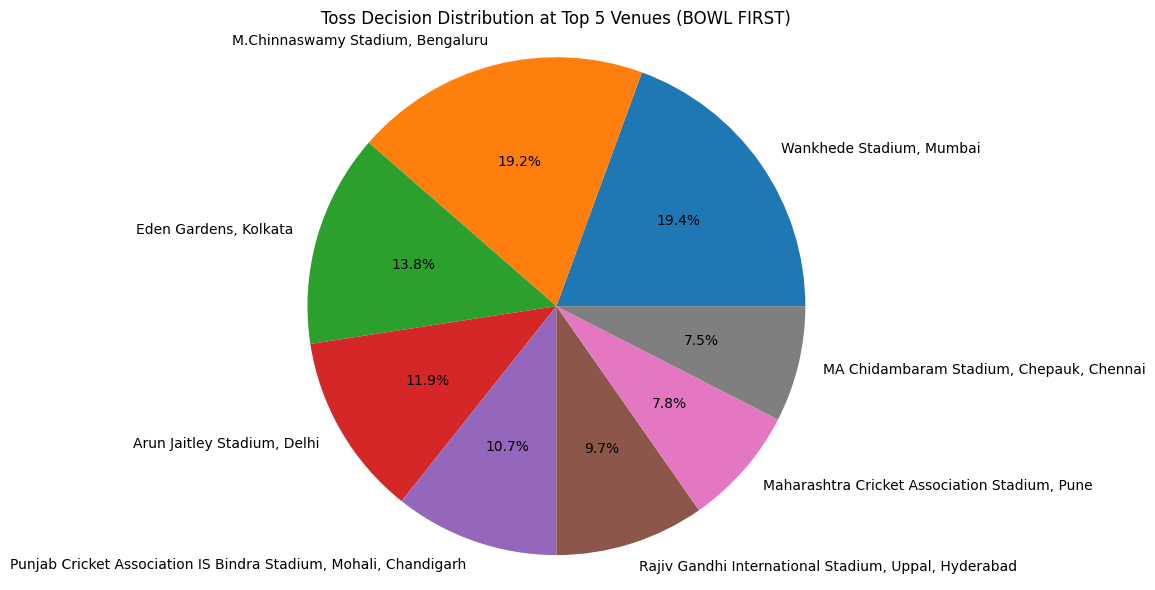

In [194]:
top_venues_bowl = toss_decision_counts['BOWL FIRST'].sort_values(ascending=False)[:8]

plt.figure(figsize=(10, 6))
plt.pie(top_venues_bowl, labels=top_venues_bowl.index, autopct='%1.1f%%')
plt.title('Toss Decision Distribution at Top 5 Venues (BOWL FIRST)')
plt.axis('equal')
plt.tight_layout()
plt.show()

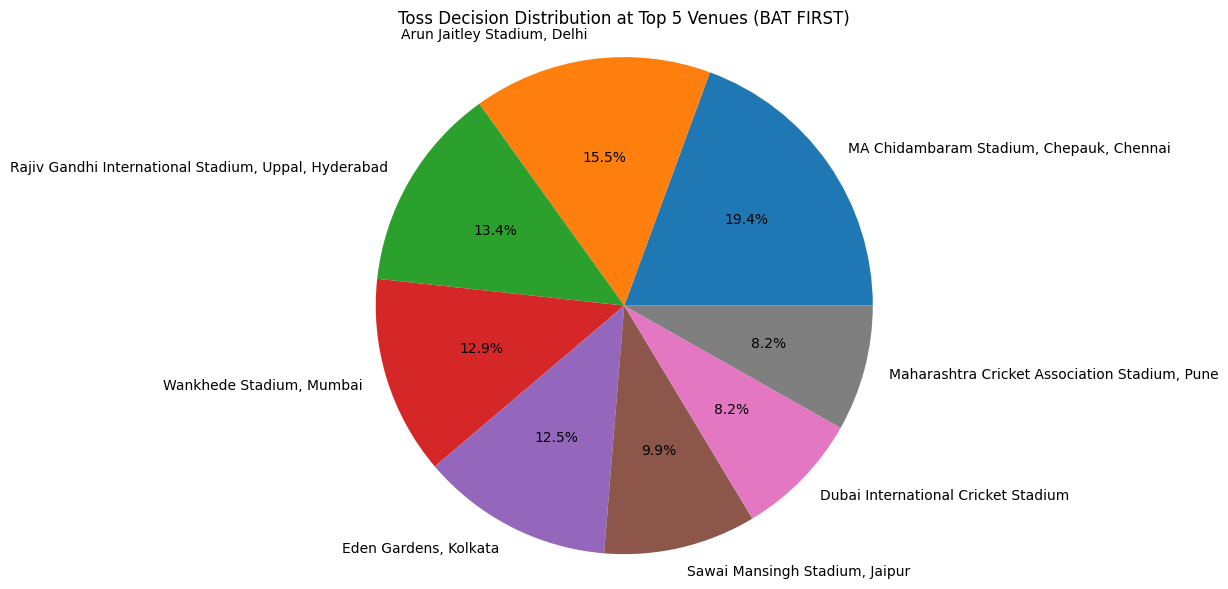

In [195]:
top_venues_bowl = toss_decision_counts['BAT FIRST'].sort_values(ascending=False)[:8]

plt.figure(figsize=(10, 6))
plt.pie(top_venues_bowl, labels=top_venues_bowl.index, autopct='%1.1f%%')
plt.title('Toss Decision Distribution at Top 5 Venues (BAT FIRST)')
plt.axis('equal')
plt.tight_layout()
plt.show()